In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from joblib import dump,load

In [145]:
df = pd.read_csv("sonar.all-data.csv")
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

<Axes: xlabel='Label', ylabel='count'>

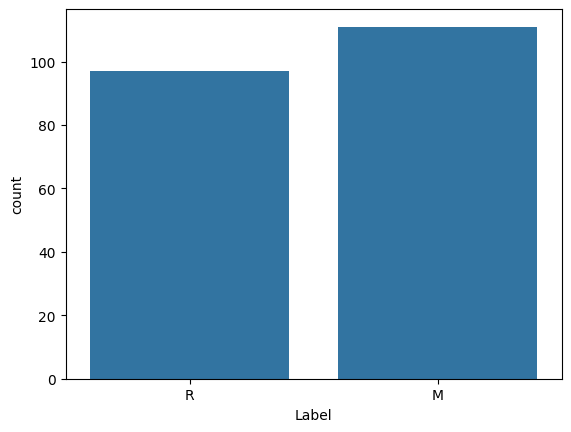

In [147]:
sns.countplot(df, x="Label")

In [148]:
df["Label"].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

In [149]:
X = df.drop("Label", axis=1)
y = df["Label"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [151]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [152]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred = knn_model.predict(scaled_X_test)
    error_rate = 1-accuracy_score(y_test,y_pred)
    test_error_rates.append(error_rate)

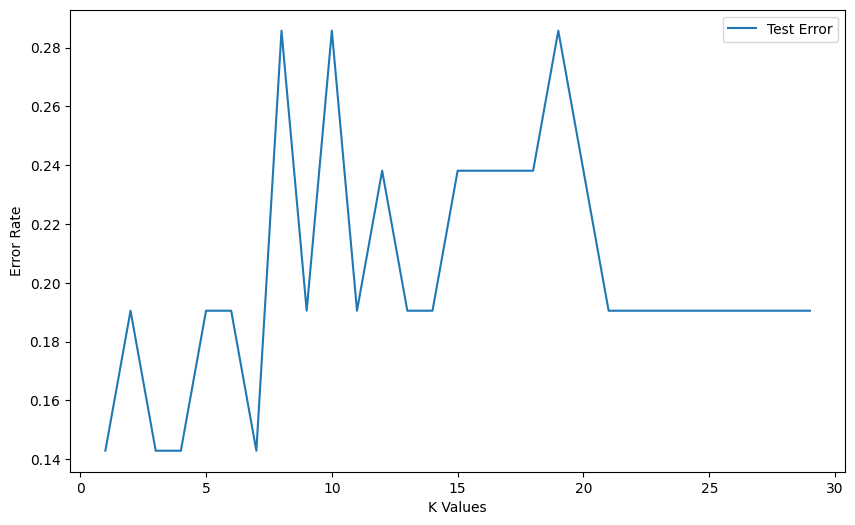

In [153]:
plt.figure(figsize = (10,6),dpi=100)
plt.plot(range(1,30),test_error_rates,label = "Test Error")
plt.ylabel("Error Rate")
plt.xlabel("K Values")
plt.legend()

In [154]:
test_error_rates_df = pd.DataFrame(test_error_rates,columns=["Error Rate"])

In [155]:
test_error_rates_df.nsmallest(5,"Error Rate")

,Error Rate
0,0.142857
2,0.142857
3,0.142857
6,0.142857
1,0.190476


In [156]:
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipe_sc_knn = Pipeline(operations)

In [157]:
k_values = list(range(1,30))
grid_param = {"knn__n_neighbors":k_values}

knn_best_model = GridSearchCV(pipe_sc_knn,
                              cv=10,
                              scoring="accuracy",
                              param_grid=grid_param)

knn_best_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [158]:
knn_best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [159]:
y_pred_gs = knn_best_model.predict(X_test)
print(classification_report(y_test,y_pred_gs))

              precision    recall  f1-score   support

           M       0.90      0.82      0.86        11
           R       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



In [160]:
knn_1_model = KNeighborsClassifier(n_neighbors=3)
knn_1_model.fit(scaled_X_train,y_train)
y_pred_1 = knn_1_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           M       0.90      0.82      0.86        11
           R       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



In [161]:
cv_results_df = pd.DataFrame(knn_best_model.cv_results_,columns=knn_best_model.cv_results_.keys())
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004511,0.000971,0.013761,0.018823,1,{'knn__n_neighbors': 1},0.842105,0.789474,0.789474,0.947368,0.894737,0.684211,0.947368,0.833333,0.888889,0.944444,0.856140,0.081345,2
1,0.004612,0.000836,0.008154,0.003032,2,{'knn__n_neighbors': 2},0.789474,0.842105,0.684211,0.789474,0.894737,0.789474,0.789474,0.833333,0.888889,0.888889,0.819006,0.061563,3
2,0.003581,0.000656,0.005633,0.000526,3,{'knn__n_neighbors': 3},0.894737,0.894737,0.789474,0.894737,0.894737,0.789474,0.842105,0.777778,0.888889,1.000000,0.866667,0.064688,1
3,0.003694,0.000523,0.005682,0.001125,4,{'knn__n_neighbors': 4},0.736842,0.842105,0.736842,0.789474,0.789474,0.789474,0.684211,0.777778,0.888889,0.944444,0.797953,0.072600,5
4,0.004005,0.000810,0.007170,0.001949,5,{'knn__n_neighbors': 5},0.684211,0.789474,0.789474,0.894737,0.842105,0.789474,0.789474,0.777778,0.888889,0.888889,0.813450,0.062518,4
5,0.004816,0.001229,0.008976,0.005442,6,{'knn__n_neighbors': 6},0.736842,0.842105,0.684211,0.842105,0.736842,0.684211,0.684211,0.777778,0.833333,0.833333,0.765497,0.065235,7
6,0.003885,0.000703,0.005633,0.000562,7,{'knn__n_neighbors': 7},0.684211,0.842105,0.842105,0.789474,0.736842,0.736842,0.789474,0.777778,0.888889,0.833333,0.792105,0.058340,6
7,0.004402,0.001185,0.006470,0.001418,8,{'knn__n_neighbors': 8},0.684211,0.842105,0.789474,0.842105,0.736842,0.736842,0.631579,0.722222,0.833333,0.777778,0.759649,0.066918,8
8,0.004250,0.002400,0.006925,0.002581,9,{'knn__n_neighbors': 9},0.631579,0.894737,0.789474,0.736842,0.736842,0.684211,0.684211,0.722222,0.833333,0.777778,0.749123,0.073494,9
9,0.004470,0.001315,0.007741,0.003648,10,{'knn__n_neighbors': 10},0.631579,0.842105,0.684211,0.736842,0.684211,0.736842,0.631579,0.722222,0.833333,0.777778,0.728070,0.070151,12


In [162]:
knn_final_model = knn_best_model.fit(X,y)

In [163]:
dump(knn_final_model,"knn_final_model_240220.joblib")

['knn_final_model_240220.joblib']

In [164]:
loaded_model = load("knn_final_model_240220.joblib")

In [168]:
sample = X_test.iloc[1]

In [169]:
sample

Freq_1     0.0454
Freq_2     0.0472
Freq_3     0.0697
Freq_4     0.1021
Freq_5     0.1397
Freq_6     0.1493
Freq_7     0.1487
Freq_8     0.0771
Freq_9     0.1171
Freq_10    0.1675
Freq_11    0.2799
Freq_12    0.3323
Freq_13    0.4012
Freq_14    0.4296
Freq_15    0.5350
Freq_16    0.5411
Freq_17    0.6870
Freq_18    0.8045
Freq_19    0.9194
Freq_20    0.9169
Freq_21    1.0000
Freq_22    0.9972
Freq_23    0.9093
Freq_24    0.7918
Freq_25    0.6705
Freq_26    0.5324
Freq_27    0.3572
Freq_28    0.2484
Freq_29    0.3161
Freq_30    0.3775
Freq_31    0.3138
Freq_32    0.1713
Freq_33    0.2937
Freq_34    0.5234
Freq_35    0.5926
Freq_36    0.5437
Freq_37    0.4516
Freq_38    0.3379
Freq_39    0.3215
Freq_40    0.2178
Freq_41    0.1674
Freq_42    0.2634
Freq_43    0.2980
Freq_44    0.2037
Freq_45    0.1155
Freq_46    0.0919
Freq_47    0.0882
Freq_48    0.0228
Freq_49    0.0380
Freq_50    0.0142
Freq_51    0.0137
Freq_52    0.0120
Freq_53    0.0042
Freq_54    0.0238
Freq_55    0.0129
Freq_56   

In [167]:
loaded_model.predict(sample.values.reshape(1,-1))

c:\Users\ericb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)